# Menggabungkan kurva hazard dari berbagai sumber

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *

## 2. Codes

Masukkan file npz ke dalam folder npzfiles, dan ganti nama file tersebut dengan ketentuan:

`source_XXXXXXXX.npz`

ganti `XXXXXXXX` dengan frasa/nama yang diinginkan.

In [2]:
srcfiles = glob.glob("./npzfiles/source_*.npz")
print(srcfiles)

# sesuaikan nilai pga dengan yang ada di job.ini --> "PGA": logscale(0.005, 2.13, 45)
pga = np.logspace(np.log10(0.005), np.log10(2.13), 45, endpoint=True)

sources = [np.load(srcfile) for srcfile in srcfiles]
geoms = np.array([[x[0], x[1]] for x in sources[0]['all.npy']])
poes = np.array([[list(x[2][0]) for x in y['all.npy']] for y in sources]).astype(np.float64)
inside_log = 1 - poes
inside_log[inside_log == 0.] = 10**(-15)
lam = -1 * np.log(inside_log) / 50
lam_sum = np.sum(lam, axis=0)
poe_sum = 1 - np.exp(lam_sum * -50)

# (a, b, c) --> a untuk jumlah source, b untuk jumlah site, c untuk jumlah nilai PGA
print(poes.shape)

['./npzfiles/source_shallow.npz', './npzfiles/source_megathrust.npz']
(2, 256, 45)


In [3]:
# ganti/tambah selected_poes dengan nilai poe yang diinginkan
selected_poes = [0.1, 0.02]

selected_pga = np.zeros((poe_sum.shape[0], len(selected_poes)))

for i, iter_poe in enumerate(poe_sum):
    for j, s_poe in enumerate(selected_poes):
        if s_poe <= np.max(iter_poe):
            selected_pga[i,j] = np.interp(s_poe, np.flip(iter_poe), np.flip(pga))

# save without header
# header => lon, lat, POE-1, POE-2, ...
np.savetxt("./npzfiles/hazard_map.csv", np.concatenate([geoms, selected_pga], axis=1), delimiter=",", fmt='%.10f')

## \#\#\# Hanya untuk validasi \#\#\#

[125.75157834   2.56095759]


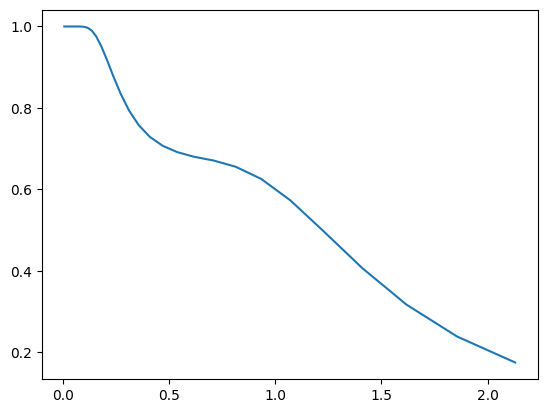

In [4]:
print(geoms[141])
plt.plot(pga, poe_sum[141,:])
# plt.loglog()

In [5]:
validator = np.load("./npzfiles/validation.npz")
poe_validator = np.array([list(x[2][0]) for x in validator['all.npy']]).astype(np.float64)
print(np.allclose(poe_validator, poe_sum))
print(np.array([poe_validator[0,:], poe_sum[0,:]]).T)

True
[[7.82203078e-01 7.82203078e-01]
 [7.01232493e-01 7.01232493e-01]
 [6.10959589e-01 6.10959589e-01]
 [5.16229391e-01 5.16229391e-01]
 [4.22344476e-01 4.22344476e-01]
 [3.34207863e-01 3.34207863e-01]
 [2.55665302e-01 2.55665302e-01]
 [1.89076334e-01 1.89076334e-01]
 [1.35165542e-01 1.35165542e-01]
 [9.32627097e-02 9.32627097e-02]
 [6.20175488e-02 6.20175488e-02]
 [3.96853313e-02 3.96853313e-02]
 [2.44120341e-02 2.44120341e-02]
 [1.44192688e-02 1.44192688e-02]
 [8.15786235e-03 8.15786235e-03]
 [4.38526971e-03 4.38526971e-03]
 [2.21433328e-03 2.21433328e-03]
 [1.03798765e-03 1.03798765e-03]
 [4.47389553e-04 4.47389553e-04]
 [1.74295245e-04 1.74295245e-04]
 [5.70740885e-05 5.70740885e-05]
 [1.40967077e-05 1.40967077e-05]
 [2.19699859e-06 2.19699859e-06]
 [7.19137603e-08 7.19137603e-08]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.0